$LL(\theta) = y^{(i)}log(h_\theta x^{(i)}) + (1 - y^{(i)})log(1 - h_\theta x^{(i)})$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dfx = pd.read_csv("../Datasets/Logistic Regression/logisticX.csv")
dfy = pd.read_csv("../Datasets/Logistic Regression/logisticY.csv")

X = dfx.values
Y = dfy.values

print(X.shape, Y.shape)
combined = np.hstack((X, Y))

np.random.shuffle(combined)
print(combined.shape)

xtr = combined[:80, :2]
xts = combined[80:, :2]

ytr = combined[:80, -1:]
yts = combined[80:, -1:]

print(xtr.shape, xts.shape)
print(ytr.shape, yts.shape)

(99, 2) (99, 1)
(99, 3)
(80, 2) (19, 2)
(80, 1) (19, 1)


In [11]:
dfx.columns

Index(['3.8915', '4.2105'], dtype='object')

In [13]:
len(dfx['4.2105'].value_counts())

99

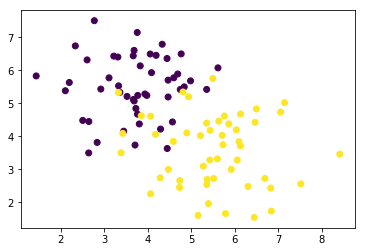

In [7]:
plt.scatter(X[:,0], X[:,1], c=Y.reshape((99,)))

In [4]:
def hypothesis(x, w, b):
    return sigmoid(np.dot(x, w) + b)

def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

def error(X, Y, w, b):
    m = X.shape[0]
    err = 0.0
    
    for i in range(m):
        hx = hypothesis(X[i], w, b)
        err += (Y[i]*np.log2(hx) + (1-Y[i])*np.log2(1-hx))
        
    return -err/m 

def get_gradient(X, Y, w, b, batch_size = 1):
    m = X.shape[0]
    grad_w = np.zeros(w.shape)
    grad_b = 0
    
    indices = np.arange(m)
    np.random.shuffle(indices)
    indices = indices[:batch_size]
    
    for i in indices:
        hx = hypothesis(X[i], w, b)
        grad_w += (Y[i] - hx)*X[i]
        grad_b += (Y[i] - hx)
        
    return grad_w/m, grad_b/m

def gradientDescent(X, Y, lr=0.01):
    w = np.random.random(X.shape[1])
    b = np.random.random()
    
    error_list = []
    acc_list = []
    
    for i in range(50000):
        grad_w, grad_b = get_gradient(X, Y, w, b)
        w = w + lr*grad_w
        b = b + lr*grad_b
        err = error(X, Y, w, b)
        error_list.append(err)
#         acc_list.append(get_accuracy())
    return error_list, w, b

def predict(x, w, b):
    confidence = hypothesis(x, w, b)
    if confidence < 0.5:
        return 0
    else:
        return 1
    
def get_accuracy(x_test, y_test, w, b):
    y_pred = []
    for i in range(y_test.shape[0]):
        y_pred.append(predict(x_test[i], w, b))
        
    y_pred = np.array(y_pred)
    y_test = y_test.reshape((-1,))
#     print(y_pred)
#     print(y_test)
#     print((y_test.reshape((-1,))))
#     print(matches, y_test.shape[0])
#     print(y_pred == y_test)
    return float((y_pred == y_test).sum())/y_test.shape[0]

In [5]:
error_list, final_w, final_b = gradientDescent(xtr, ytr)
print(final_w, final_b)

[ 1.0264119  -1.02019417] [0.0139012]


0.9473684210526315
[0.39864603]
50000


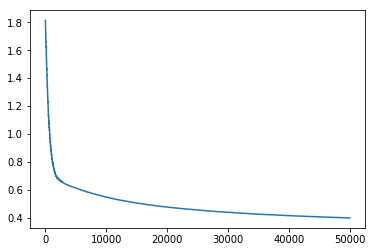

In [6]:
print(get_accuracy(xts, yts, final_w, final_b))
plt.plot(error_list)
print(error_list[-1])
print(len(error_list))

In [7]:
x = np.linspace(2,8,10)
y = -(final_w[0]*x + final_b)/final_w[1]
print(y.shape)

print(x)
print(y)

(10,)
[2.         2.66666667 3.33333333 4.         4.66666667 5.33333333
 6.         6.66666667 7.33333333 8.        ]
[2.02581534 2.69654511 3.36727488 4.03800465 4.70873442 5.37946419
 6.05019396 6.72092373 7.3916535  8.06238326]


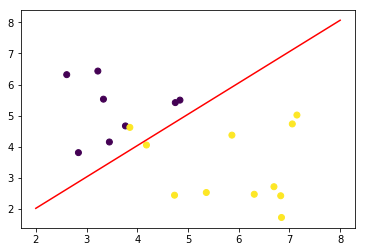

In [8]:
plt.scatter(xts[:,0], xts[:,1], c=yts.reshape((19,)))
plt.plot(x,y, c='red')
plt.show()

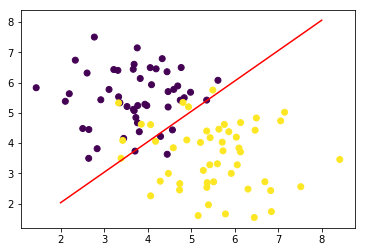

In [12]:
plt.scatter(X[:,0], X[:,1], c=Y.reshape((99,)))
plt.plot(x,y, c='red')
plt.show()

In [14]:
print(get_accuracy(xts, yts, final_w, final_b))
print(get_accuracy(xtr, ytr, final_w, final_b))
print(get_accuracy(X, Y, final_w, final_b))

0.9473684210526315
0.8625
0.8787878787878788
